# Initial Model Creation

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Creation of Dataset 

In [2]:
def create_df(state, filename):
    df = pd.read_csv(filename)
    df['state'] = state
    return df
        

In [3]:
smiles = ['smile_close.csv', 'smile_1.csv', 'smile_2.csv' ]
neutrals = ['n_close.csv', 'neutral_1.csv', 'neutral_2.csv']
frowns = ['f_close.csv', 'frown_1.csv', 'frown_2.csv']

In [4]:
stated_dfs = []
# for smile in smiles:
#     stated_dfs.append(create_df(1, "csvs/old/{}".format(smile)))
    

for neutral in neutrals:
    stated_dfs.append(create_df(0, "csvs/old/{}".format(neutral)))
    
for frown in frowns:
    stated_dfs.append(create_df(2,"csvs/old/{}".format(frown)))


## Put it all together

In [5]:
all_df = pd.concat(stated_dfs)

In [6]:
all_df['state'] = all_df['state'].astype('int')
y = np.asarray(all_df['state'])
y [0:5]

array([0, 0, 0, 0, 0])

In [7]:
just_x_df = all_df.drop('state', axis = 1)

In [8]:
just_x_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z464,x465,y465,z465,x466,y466,z466,x467,y467,z467
0,0.557348,0.504291,-0.029540,0.558510,0.457494,-0.053428,0.557838,0.472896,-0.028796,0.551814,...,0.002312,0.579076,0.381389,-0.004731,0.635993,0.376924,0.015871,0.642316,0.369880,0.016583
1,0.556082,0.504602,-0.029842,0.558304,0.458477,-0.053165,0.557198,0.473880,-0.028751,0.551742,...,0.003484,0.578332,0.380002,-0.003722,0.634877,0.373910,0.017069,0.640836,0.368078,0.017589
2,0.555343,0.504497,-0.029882,0.557518,0.457749,-0.052660,0.556498,0.473634,-0.028467,0.551057,...,0.003212,0.577497,0.379677,-0.003741,0.634045,0.372982,0.016444,0.639867,0.367064,0.016952
3,0.556191,0.504424,-0.029752,0.558315,0.457611,-0.052564,0.557224,0.473436,-0.028299,0.551714,...,0.003036,0.577931,0.379354,-0.003904,0.634406,0.372128,0.016417,0.640213,0.366300,0.016912
4,0.555687,0.504464,-0.029726,0.557856,0.457536,-0.052574,0.556803,0.473423,-0.028313,0.551442,...,0.002983,0.577806,0.379277,-0.003955,0.634480,0.371981,0.016270,0.640305,0.366129,0.016747


In [9]:
X = np.asarray(just_x_df)
X[0:5]

array([[ 0.55734807,  0.50429058, -0.02954028, ...,  0.64231557,
         0.36988014,  0.01658321],
       [ 0.55608213,  0.50460243, -0.02984167, ...,  0.6408363 ,
         0.36807829,  0.01758885],
       [ 0.55534345,  0.50449681, -0.0298825 , ...,  0.63986653,
         0.3670643 ,  0.01695206],
       [ 0.55619109,  0.50442427, -0.02975215, ...,  0.64021331,
         0.36630008,  0.01691198],
       [ 0.55568725,  0.50446427, -0.02972572, ...,  0.64030451,
         0.36612895,  0.0167472 ]])

In [10]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score # Accuracy metrics 
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
pipelines = {
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}
fit_models = {}

In [13]:
fit_models


{}

In [14]:
train = {}
train['pipeline'] = pipelines['gb']

In [15]:
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    for algo, pipeline in train.items():
        model = pipeline.fit(X_train, y_train)
        fit_models[algo] = model

Train: [   0    2    3 ... 2139 2140 2141] Validation: [   1   16   20   31   32   36   37   41   45   47   52   60   67   68
   75   79   82   83   85   91   92   99  107  112  114  119  123  129
  131  133  136  138  142  143  145  158  160  164  169  176  181  190
  193  214  215  217  218  225  237  238  239  244  248  253  254  255
  257  265  270  273  276  285  286  287  288  293  294  298  302  307
  308  313  315  332  333  342  346  354  363  371  375  379  380  385
  386  392  394  401  404  418  427  430  431  433  445  446  449  460
  463  466  478  482  486  489  495  498  507  515  522  526  527  529
  542  550  553  554  563  566  570  571  575  576  578  586  590  596
  604  605  609  614  621  624  636  641  649  654  661  669  671  678
  680  682  690  696  700  706  708  709  714  715  717  719  720  726
  730  731  742  748  752  753  754  760  763  767  773  774  776  777
  778  779  788  790  797  800  801  807  810  811  813  816  820  825
  828  838  839  843  

Train: [   0    1    2 ... 2137 2138 2141] Validation: [  10   19   39   51   71   73   76   87   88   93   95  105  111  113
  118  132  135  139  144  148  149  152  155  163  168  170  179  182
  185  188  191  192  195  197  200  202  205  216  219  222  228  241
  242  245  249  251  259  260  264  272  278  292  296  303  304  312
  319  328  337  349  356  359  367  370  373  381  382  383  384  391
  393  396  397  398  400  402  405  410  441  443  448  452  457  459
  461  465  468  476  477  481  488  493  500  501  513  516  518  519
  525  528  530  532  534  537  538  541  546  548  555  558  581  583
  587  588  592  593  597  600  602  606  612  615  629  630  635  640
  642  644  653  656  667  670  672  685  686  688  703  704  722  727
  735  737  755  757  770  772  784  787  794  796  803  814  819  832
  834  837  851  852  855  866  868  870  879  882  887  897  898  906
  931  939  941  947  948  955  960  962  966  968  972  973  985  987
  996  998 1000 1001 1

Train: [   0    1    2 ... 2139 2140 2141] Validation: [   8    9   15   16   17   25   29   45   46   49   50   52   55   66
   68   75   79   80   92   99  108  110  113  116  117  119  120  123
  124  127  135  142  144  146  148  155  156  164  169  177  186  195
  197  214  215  217  218  222  228  233  235  236  244  246  248  249
  257  274  275  278  290  291  293  294  297  301  307  314  319  321
  322  334  337  340  341  344  353  362  366  374  376  393  395  396
  398  399  400  401  402  408  419  428  430  433  435  447  450  451
  452  457  458  459  466  474  477  482  484  491  492  499  501  507
  514  521  530  531  538  547  548  559  573  575  576  580  590  597
  604  606  608  610  614  617  619  622  625  629  635  650  652  660
  661  663  672  675  683  684  686  689  690  695  701  705  707  708
  726  727  728  740  745  754  760  767  769  779  785  787  791  794
  799  804  818  822  823  824  829  837  851  852  863  864  869  874
  875  880  887  890  

Train: [   1    2    3 ... 2138 2139 2141] Validation: [   0   12   16   18   28   33   38   40   41   49   60   63   64   68
   75   77   81   84   85   89   91  100  103  106  107  110  111  114
  134  137  139  141  142  144  145  149  153  154  158  162  165  166
  172  174  184  188  190  193  198  204  209  214  215  216  219  221
  224  236  241  243  245  246  249  251  261  268  277  282  283  284
  287  292  294  306  310  316  317  346  352  357  358  360  363  369
  376  378  380  383  384  385  388  392  419  431  444  449  451  456
  465  473  479  491  498  500  503  510  514  515  516  518  524  525
  534  539  548  556  559  562  566  574  577  582  583  596  598  604
  605  615  616  618  620  624  627  629  630  633  636  638  639  670
  672  674  680  681  684  687  690  693  700  703  707  709  712  720
  724  728  735  737  749  754  756  775  779  781  786  788  792  796
  801  804  810  811  813  816  818  820  821  822  833  854  858  859
  861  863  873  880  

Train: [   0    1    4 ... 2138 2140 2141] Validation: [   2    3    6    7   13   22   25   38   40   46   47   49   51   53
   56   59   60   71   79   90  110  118  122  125  131  140  146  148
  149  153  154  156  165  170  171  173  177  202  207  217  219  226
  227  229  234  237  240  256  257  271  276  278  280  282  286  287
  294  295  307  309  310  328  331  332  335  338  341  343  346  352
  356  358  362  364  365  370  372  376  378  380  383  386  392  395
  407  410  417  420  428  438  441  446  455  473  475  476  478  480
  482  483  489  493  496  498  500  512  513  520  523  530  537  548
  552  554  559  570  574  575  581  584  588  590  591  600  601  604
  607  608  614  617  634  636  640  642  644  646  656  657  672  679
  683  690  691  692  693  695  699  700  704  705  716  723  731  737
  744  747  750  752  756  759  760  766  769  777  781  783  796  802
  804  809  814  815  818  825  828  831  834  837  838  843  844  846
  847  853  854  858  

Train: [   0    2    3 ... 2137 2138 2139] Validation: [   1   12   14   22   23   44   45   46   47   52   53   57   65   67
   68   75   77   83  101  102  103  115  117  118  119  120  130  132
  145  146  149  154  156  157  160  166  173  177  178  190  193  195
  196  197  198  204  211  222  227  229  234  235  239  244  251  259
  260  272  273  277  279  294  296  299  303  312  314  315  328  329
  334  340  344  346  348  358  360  378  379  380  385  388  391  394
  396  402  412  416  422  429  430  442  443  446  448  452  459  460
  463  466  472  473  483  484  485  488  491  516  521  531  540  544
  548  549  552  555  557  563  565  567  572  577  580  582  584  587
  588  591  601  605  608  610  611  622  625  628  633  634  635  641
  652  653  659  660  662  667  694  695  698  699  701  704  710  713
  714  721  723  730  731  732  737  742  743  748  753  756  762  765
  766  767  769  772  780  785  786  793  794  804  807  845  854  855
  856  864  866  869  

Train: [   0    1    2 ... 2138 2140 2141] Validation: [   4    5    7   10   27   28   40   49   51   58   61   66   73   78
   79   87   88   90   96   97   98  104  107  113  114  116  122  124
  125  126  127  134  137  141  142  150  158  161  162  163  164  171
  185  187  203  213  214  216  230  241  246  249  258  270  278  280
  292  293  297  298  300  302  304  307  308  310  317  322  325  330
  331  333  337  338  341  342  347  349  357  366  373  382  390  397
  400  408  420  421  437  444  449  451  454  455  461  474  497  499
  500  508  512  514  517  535  537  539  554  559  560  564  570  579
  581  586  589  590  600  607  612  616  621  623  630  639  643  645
  647  649  651  657  658  675  680  685  692  693  716  717  719  729
  733  736  739  745  747  758  760  768  773  775  776  779  781  783
  784  787  791  792  797  799  800  802  809  820  821  824  835  842
  843  848  852  853  858  859  861  867  871  876  885  888  893  895
  899  902  912  915  

Train: [   0    2    3 ... 2139 2140 2141] Validation: [   1    4   13   14   21   27   31   33   36   46   48   49   56   62
   69   70   73   77   78   80   83   93  104  108  110  111  114  122
  126  132  133  134  138  143  149  150  165  167  169  170  174  175
  179  181  182  184  194  195  200  205  206  210  214  221  223  225
  229  232  239  244  248  256  258  273  274  280  281  285  291  292
  296  298  310  312  318  322  324  330  336  351  352  356  360  366
  368  371  374  375  378  380  381  382  383  389  396  400  401  413
  416  420  421  425  435  437  440  447  463  470  471  474  485  505
  513  520  524  527  529  530  536  537  539  544  550  557  559  567
  569  577  579  582  586  590  593  595  596  601  602  608  612  618
  619  629  636  638  641  649  655  657  662  663  667  690  693  705
  713  714  716  718  730  732  735  744  746  757  760  770  777  779
  784  786  787  791  792  802  804  806  811  818  822  834  836  837
  840  843  846  847  

Train: [   1    2    3 ... 2137 2139 2141] Validation: [   0   12   13   14   21   28   31   33   43   46   47   51   54   58
   59   62   72   73   98   99  101  107  111  124  130  135  148  150
  163  168  172  174  177  181  184  185  191  192  195  198  207  209
  227  232  233  257  258  266  275  291  301  313  314  315  317  321
  323  333  340  342  357  361  362  363  370  371  373  395  400  408
  413  424  432  441  442  443  454  455  458  473  475  478  488  491
  493  495  499  500  509  512  520  522  526  527  533  545  547  551
  556  560  564  573  577  585  588  592  594  595  596  597  598  599
  607  611  620  625  627  629  634  638  639  649  661  662  670  679
  711  722  724  725  726  739  743  754  755  763  764  772  773  777
  785  793  795  803  810  816  822  825  827  829  831  842  843  844
  845  847  849  852  860  867  882  883  885  889  890  899  908  909
  913  919  925  926  927  928  935  939  942  943  947  948  955  956
  957  958  959  961  

Train: [   0    1    2 ... 2138 2139 2140] Validation: [   9   12   18   21   37   39   40   43   55   57   59   62   66   71
   81   92   99  105  113  115  135  139  146  151  157  158  166  175
  184  191  205  208  212  223  227  241  242  247  250  253  254  256
  257  260  262  266  268  272  276  277  304  306  315  317  319  326
  337  338  342  343  357  369  371  372  376  377  384  385  389  391
  393  394  395  399  405  413  414  415  417  422  432  433  438  440
  442  446  449  450  452  464  475  476  489  499  502  506  507  509
  513  519  523  532  538  544  556  562  584  586  592  594  596  598
  605  607  613  615  626  643  644  648  649  651  656  662  666  667
  674  677  678  683  684  685  691  695  699  700  705  706  710  716
  724  725  728  730  739  741  744  761  762  770  771  779  788  799
  806  817  820  822  830  832  834  835  837  843  846  848  851  860
  861  865  866  867  868  877  888  905  913  918  919  921  924  925
  927  935  936  943  

Train: [   0    1    2 ... 2139 2140 2141] Validation: [  24   35   39   42   43   45   46   47   59   61   82   87   92  104
  110  115  120  127  135  136  138  141  150  153  163  176  183  187
  189  191  196  197  198  205  207  209  214  216  230  233  241  243
  244  248  253  254  265  266  272  276  277  285  287  293  299  300
  310  314  327  329  331  333  342  353  354  356  361  362  364  368
  382  389  395  408  410  412  414  423  425  426  432  437  447  449
  454  456  459  475  479  483  484  485  493  502  504  506  523  524
  527  529  533  536  537  550  555  564  565  571  576  577  579  589
  590  599  620  623  642  643  653  660  673  674  675  690  695  704
  716  717  721  728  730  739  744  754  774  777  778  798  801  802
  806  814  815  816  818  820  832  833  835  838  839  843  848  849
  857  866  868  873  876  884  889  891  894  900  904  911  916  923
  924  931  934  936  941  948  956  960  967  969  977  980  981  983
  988  989 1001 1002 1

Train: [   2    3    4 ... 2139 2140 2141] Validation: [   0    1    9   11   14   15   19   21   25   27   28   32   34   38
   49   51   53   54   55   56   74   84   89   90   94   99  100  101
  117  118  129  131  146  148  151  154  161  165  166  172  173  177
  188  200  202  215  224  225  229  237  239  252  258  260  263  270
  271  273  275  288  289  295  298  306  309  313  317  321  322  324
  330  332  339  348  351  358  366  367  369  373  378  392  393  400
  401  406  407  409  411  417  418  419  424  428  429  438  441  451
  455  457  458  468  469  473  474  478  481  490  497  507  508  510
  511  514  517  522  526  528  530  535  539  567  569  575  578  583
  584  585  587  597  608  612  615  618  621  624  626  627  631  632
  635  641  645  651  654  658  664  666  667  676  678  681  688  694
  707  709  711  715  726  727  735  741  749  753  755  767  776  782
  784  786  789  797  799  807  808  809  817  819  823  824  825  846
  847  851  852  854  

Train: [   0    1    2 ... 2139 2140 2141] Validation: [  12   15   35   39   40   42   43   45   56   64   67   68   73   76
   77   83   86   98  106  108  110  113  123  127  130  135  137  139
  143  149  150  151  152  157  158  172  175  183  189  191  192  193
  200  208  210  211  213  218  220  225  226  231  247  250  254  255
  257  275  283  285  288  289  293  295  296  303  311  314  317  318
  321  325  326  327  335  339  341  352  357  368  376  379  384  385
  387  398  400  405  409  411  412  420  422  425  426  428  447  449
  464  466  467  471  472  477  482  484  486  488  492  497  501  502
  507  509  511  513  516  517  524  540  543  544  547  551  554  555
  562  563  564  568  573  579  593  599  602  609  619  624  626  629
  632  637  653  654  655  669  673  675  684  686  687  689  705  714
  718  723  729  735  739  741  747  750  759  764  767  769  772  773
  779  785  789  797  803  809  810  811  815  818  821  824  829  833
  835  836  839  841  

In [16]:
test = {}

test['gb'] = fit_models['pipeline']


# lr = {}
# lr['lr'] = fit_models['lr']

# rc = {}
# rc['rc'] = fit_models['rc']

# rf = {}
# rf['rf'] = fit_models['rf']

## Model

gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           2       1.00      1.00      1.00       273

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

Confusion matrix, without normalization
[[156   0   0]
 [  0   0   0]
 [  0   0 273]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           2       1.00      1.00      1.00       261

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

Confusion matrix, without normalization
[[168   0   0]
 [  0   0   0]
 [  0   0 261]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           2       1.00      1.00      1.00 

gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           2       1.00      1.00      1.00       262

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

Confusion matrix, without normalization
[[167   0   0]
 [  0   0   0]
 [  0   0 262]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           2       1.00      1.00      1.00       273

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

Confusion matrix, without normalization
[[156   0   0]
 [  0   0   0]
 [  0   0 273]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           2       1.00      1.00      1.00 

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           2       1.00      1.00      1.00       258

   micro avg       1.00      1.00      1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428

Confusion matrix, without normalization
[[170   0   0]
 [  0   0   0]
 [  0   0 258]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       268

   micro avg       1.00      1.00      1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428

Confusion matrix, without normalization
[[160   0   0]
 [  0   0   0]
 [  0   0 268]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           2       1.00      1.00      1.00 

gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       281

   micro avg       1.00      1.00      1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428

Confusion matrix, without normalization
[[147   0   0]
 [  0   0   0]
 [  0   0 281]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           2       1.00      1.00      1.00       251

   micro avg       1.00      1.00      1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428

Confusion matrix, without normalization
[[177   0   0]
 [  0   0   0]
 [  0   0 251]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           2       1.00      1.00      1.00 

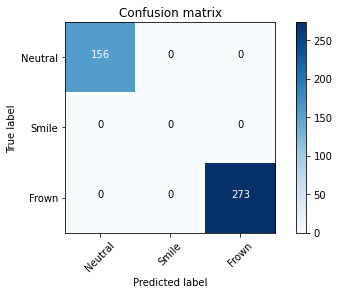

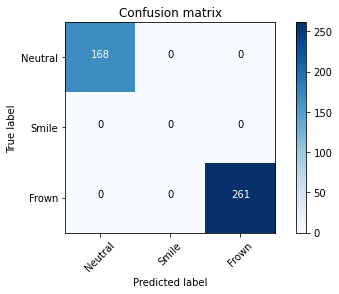

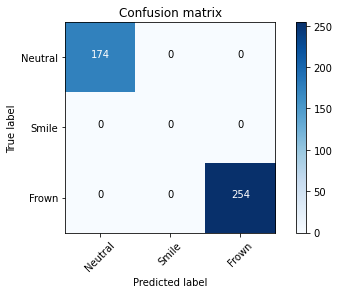

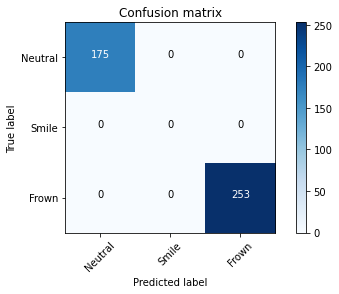

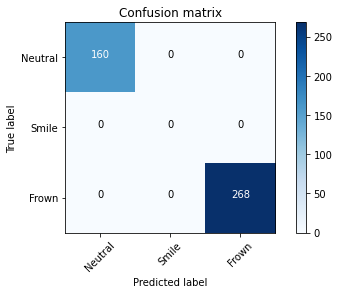

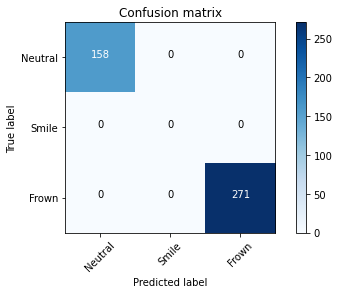

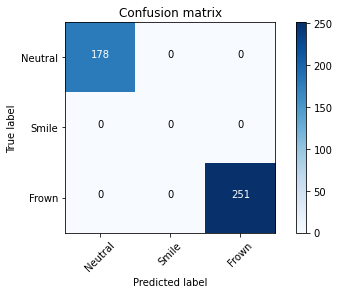

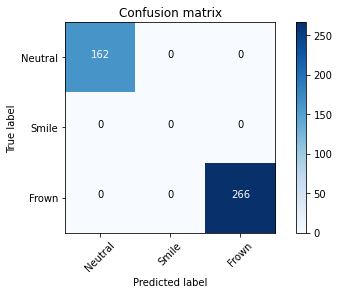

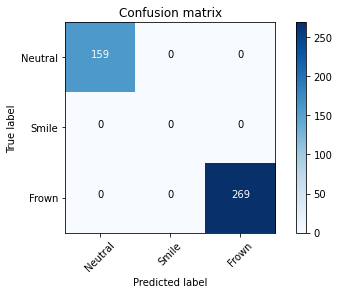

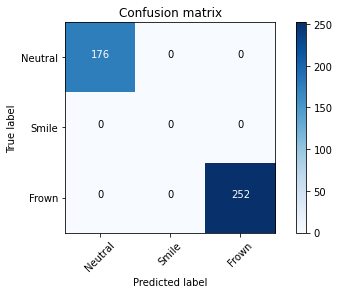

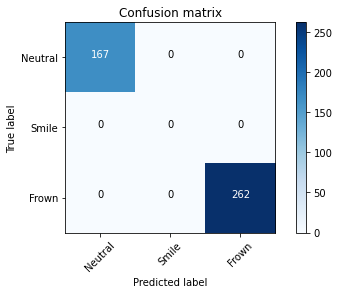

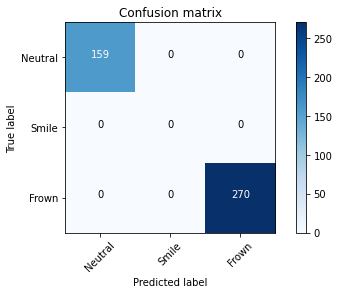

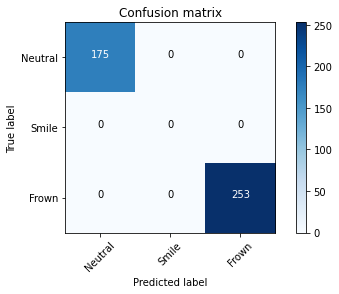

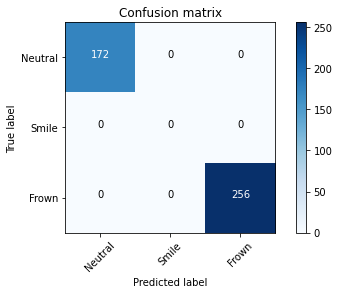

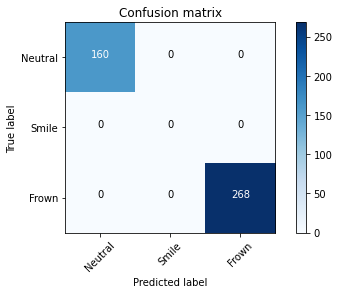

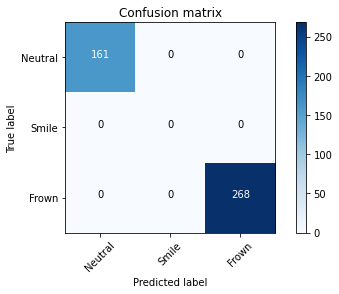

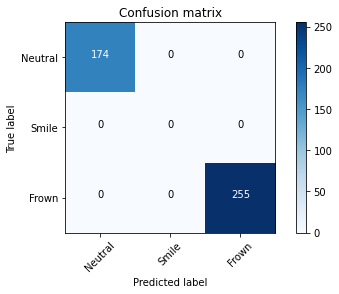

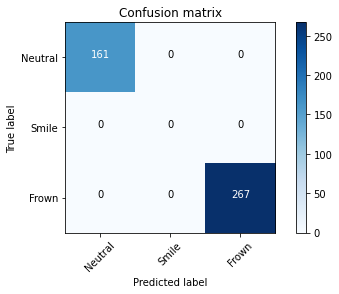

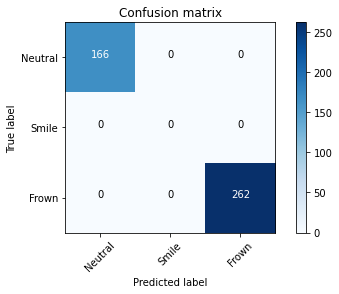

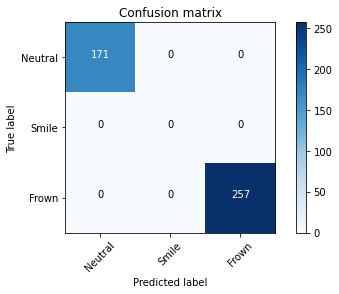

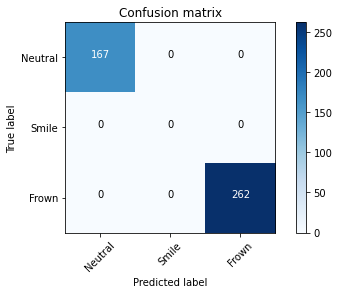

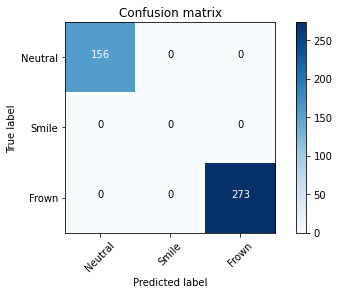

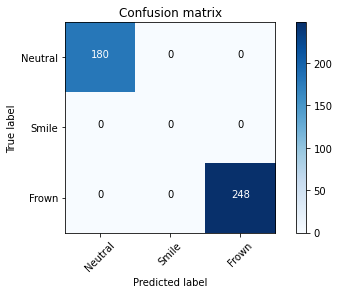

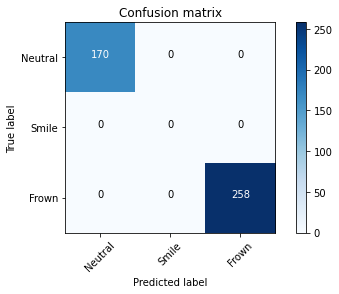

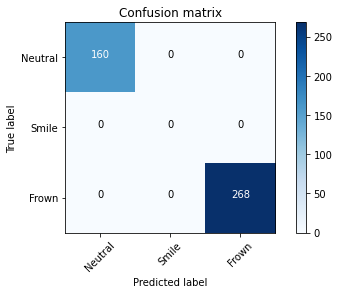

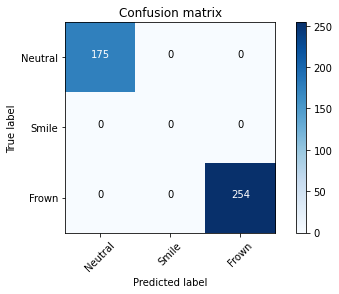

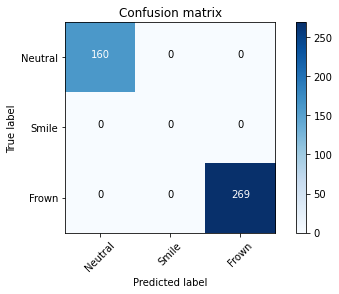

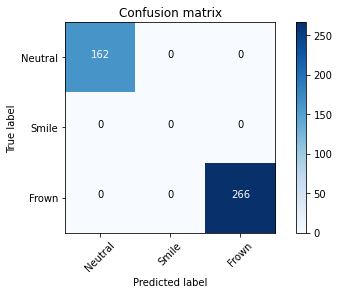

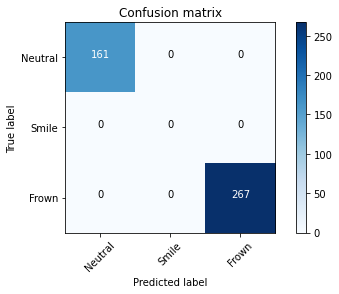

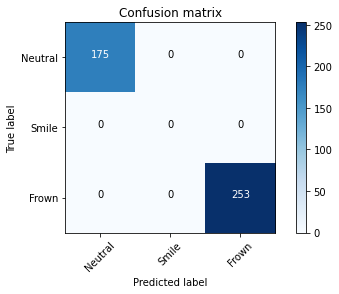

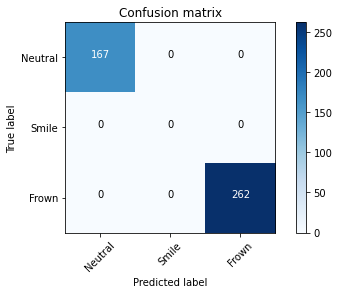

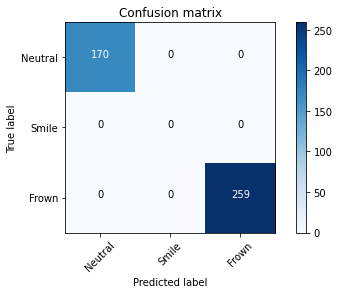

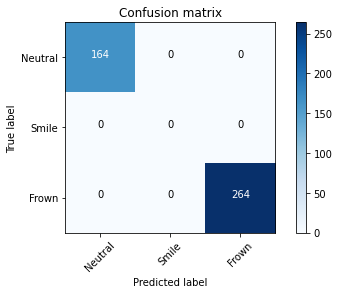

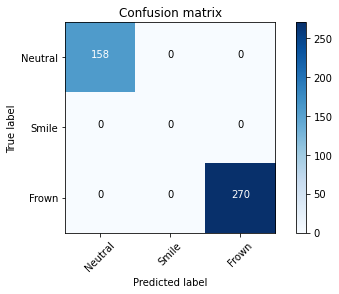

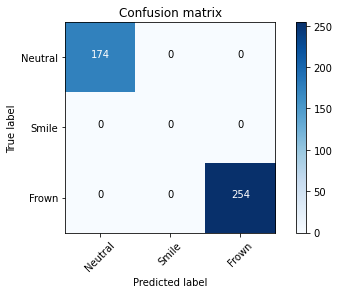

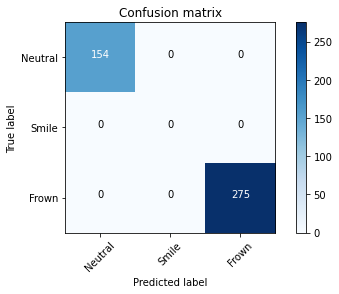

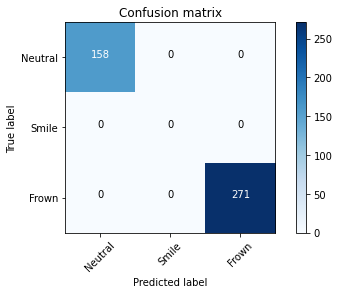

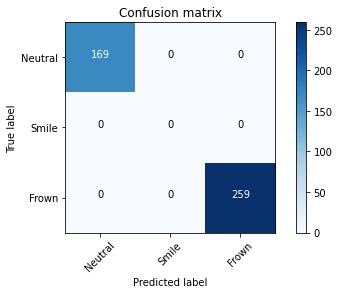

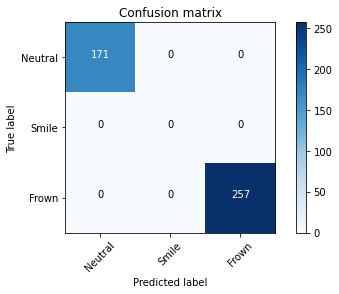

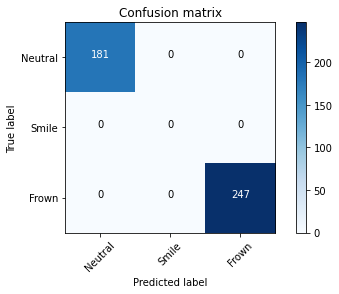

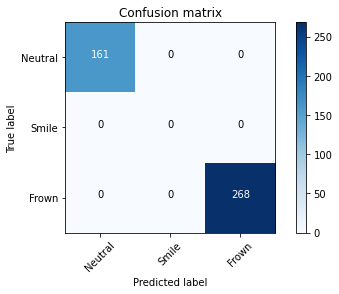

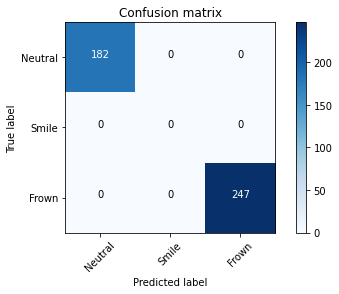

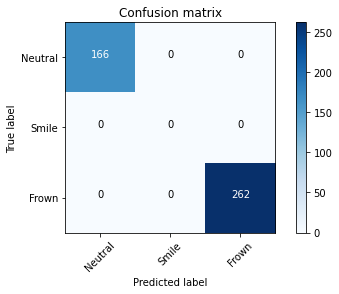

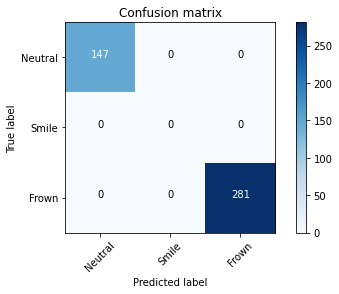

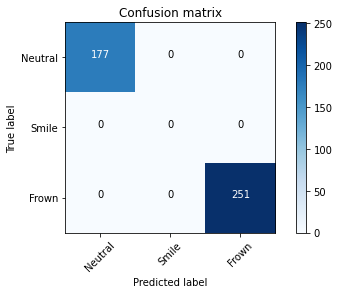

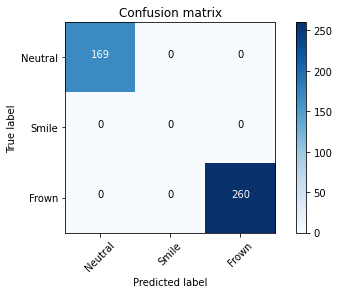

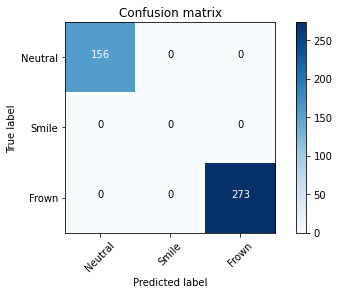

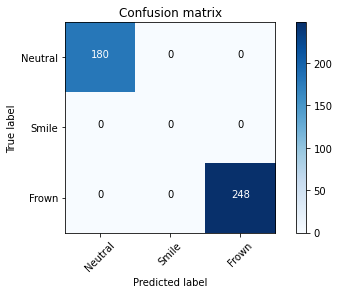

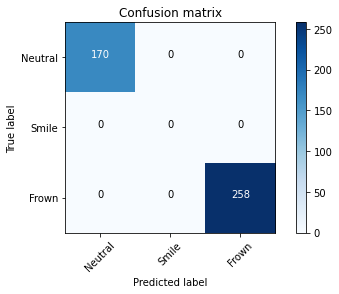

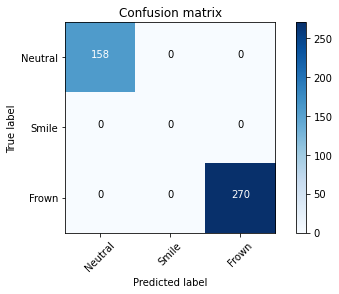

In [17]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in test.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Neutral','Smile', 'Frown'],normalize= False,  title='Confusion matrix')


In [18]:
import pickle
with open('neutral_frown_1.pkl', 'wb') as f:
    pickle.dump(test['gb'], f)

In [19]:
with open('neutral_frown_1.pkl', 'rb') as f:
    model = pickle.load(f)

In [20]:
import cv2
import mediapipe
import numpy as np
import csv
cap = cv2.VideoCapture(0)

# facemesh

faceModule = mediapipe.solutions.face_mesh
mp_drawing = mediapipe.solutions.drawing_utils # Drawing helpers

circleDrawingSpec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=(0,255,0))
lineDrawingSpec = mp_drawing.DrawingSpec(thickness=1, color=(0,255,0))
 
with faceModule.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = face.process(image)
        #print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        if results.multi_face_landmarks != None:
            for faceLandmarks in results.multi_face_landmarks:
                point_values = []

                for i in range(0, 468):
                    pt1 = faceLandmarks.landmark[i]

                    point_values.append(pt1.x)
                    point_values.append(pt1.y)
                    point_values.append(pt1.z)
                
                
                 # Make Detections
                X = pd.DataFrame([point_values])
                body_language_class = model.predict(X)[0]
                print(body_language_class)
                
                mp_drawing.draw_landmarks(image, faceLandmarks, faceModule.FACEMESH_CONTOURS, circleDrawingSpec, lineDrawingSpec)
 

                # Display Class
                cv2.putText(image, 'CLASS'
                            , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, str(body_language_class)
                            , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
0
2
2
0
0
0
0
0
0
0
0
0
0
0
2
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
2
0
0
0
2
0
0
0
0
2
0
2
2
2
0
0
0
0
0
0
0
0
0
0
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
2
2
2
0
0
0
0
0
0
2
2
0
0
2
2
2
2
2
2
2
2
2
2
0
2
2
2
2
2
2
2
2
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
2
2
0
0
2
2
2
2
2
0
0
0
2
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
0
0
0
0
0
2
2
2
0
0
0
2
0
0
0
0
0
